In [1]:
#importing required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the data
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#information about the DataFrame
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
# Summary statistics of numerical columns
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# Check for missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# print the unique value in each columns
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [8]:
# now create dataframe as final data to only include required columns
final_data=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
# add new column for current year
final_data['Current Year']=2023
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [10]:
# now add new column to calculate no. of year for car
final_data['no_year']=final_data['Current Year']- final_data['Year']
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [11]:
# now drop the year column which is not required
final_data.drop(['Year'], axis=1,inplace=True)
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [12]:
# Convert categorical variables to one-hot encoding
final_data=pd.get_dummies(final_data,drop_first=True)
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current Year,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2023,9,False,True,False,True
1,4.75,9.54,43000,0,2023,10,True,False,False,True
2,7.25,9.85,6900,0,2023,6,False,True,False,True
3,2.85,4.15,5200,0,2023,12,False,True,False,True
4,4.60,6.87,42450,0,2023,9,True,False,False,True


In [13]:
# now drop the current year column
final_data.drop(['Current Year'],axis=1,inplace=True)
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


In [14]:
#correlation between columns in a Data
final_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


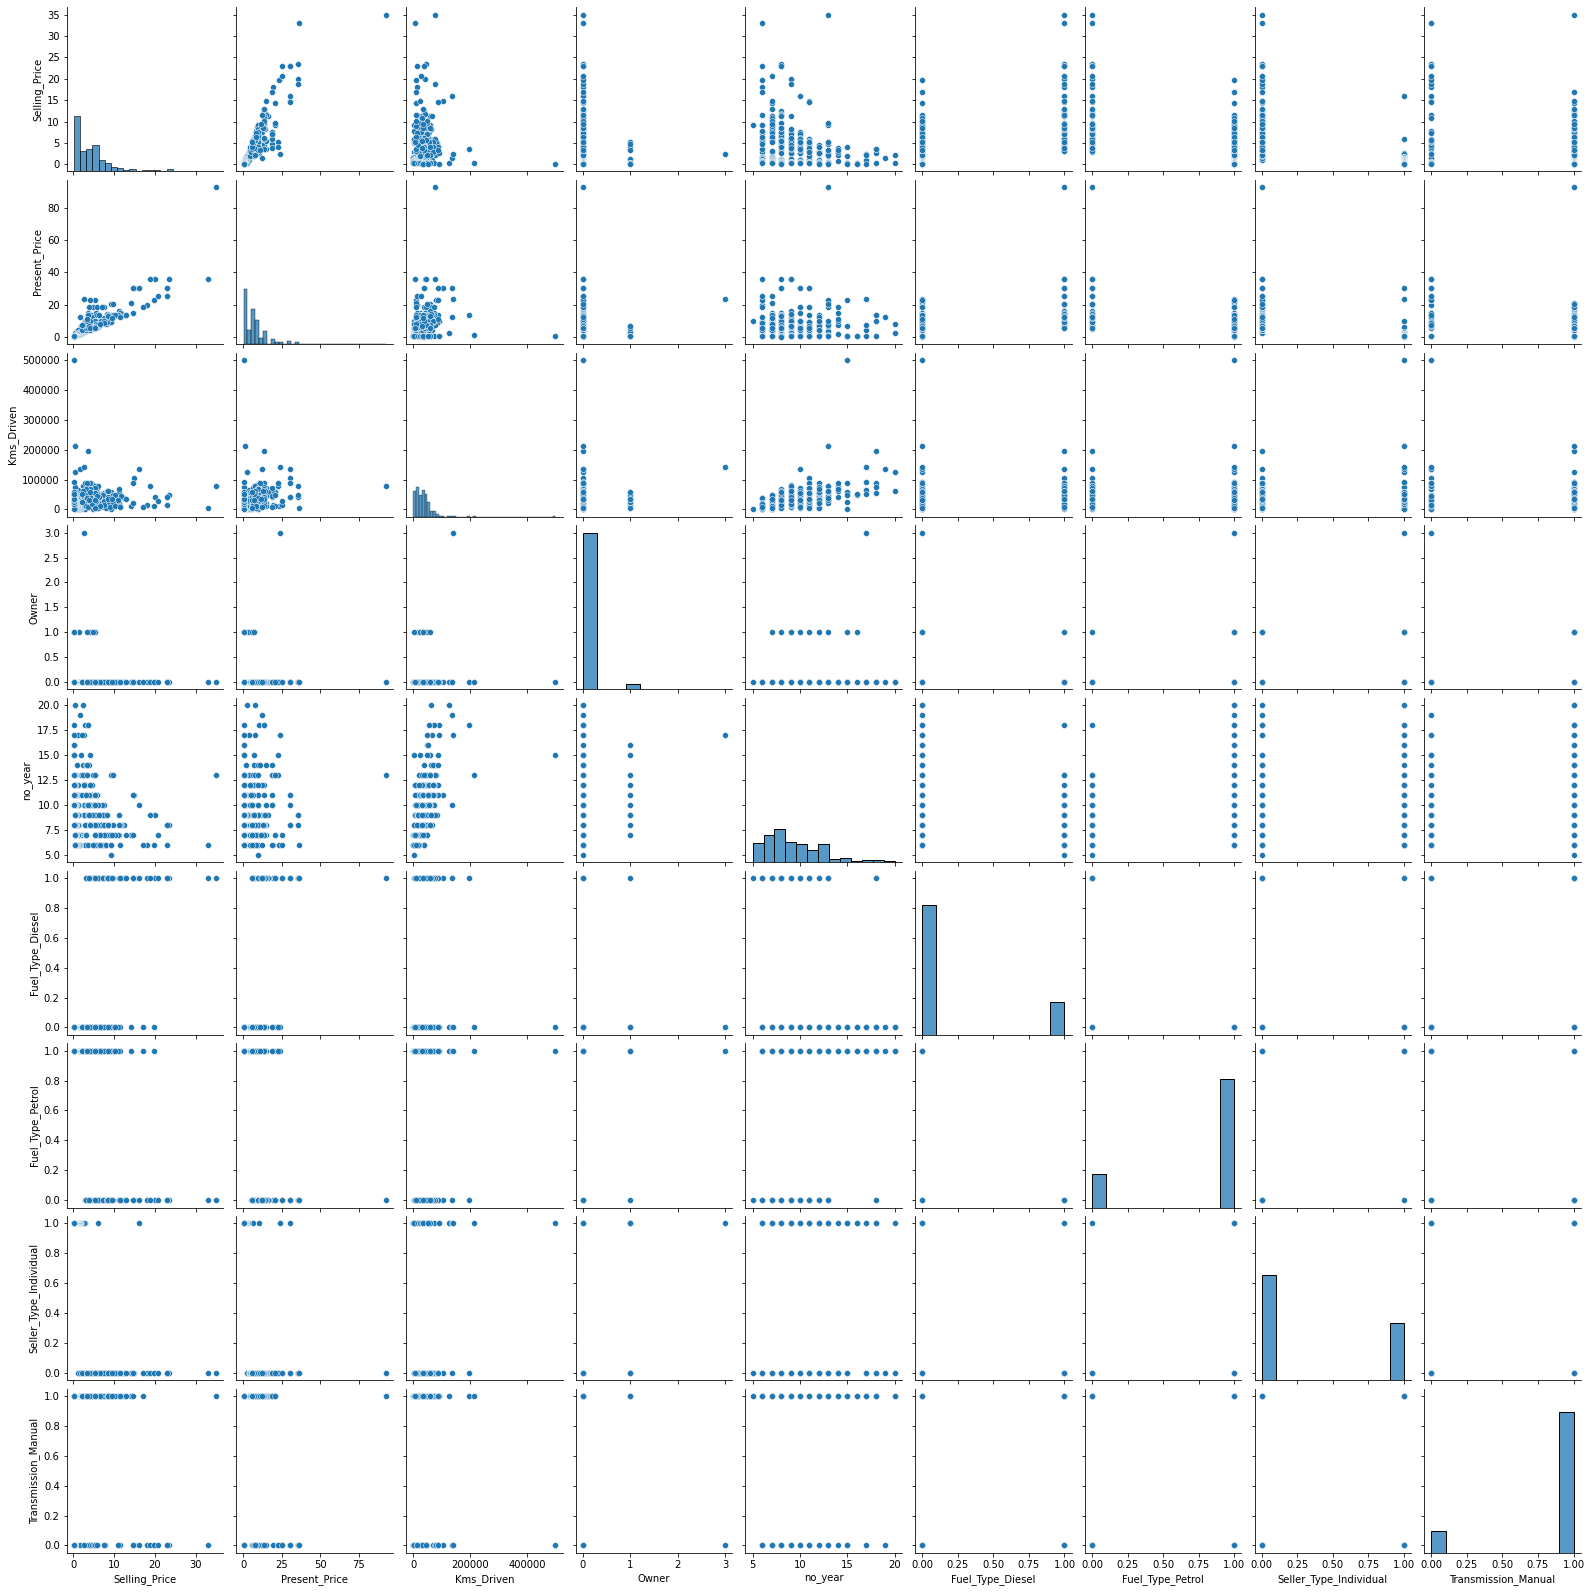

In [15]:
# create a grid of scatterplots for all pairs of numerical columns in a Data
sns.pairplot(final_data)

In [16]:
# #get correlations of each features in dataset
# corrmat = df.corr()
# top_corr_features = corrmat.index

# #plot heat map
# g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
# creating feature matrix X and target vector y from 
X=final_data.iloc[:,1:]
y=final_data.iloc[:,0]

In [18]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,False,True,False,True
1,9.54,43000,0,10,True,False,False,True
2,9.85,6900,0,6,False,True,False,True
3,4.15,5200,0,12,False,True,False,True
4,6.87,42450,0,9,True,False,False,True


In [19]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [20]:
# Importance of features
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)

[0.37822559 0.04007306 0.0004321  0.0791223  0.21908266 0.01320053
 0.13147599 0.13838777]


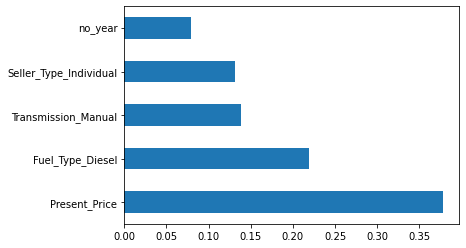

In [22]:
#plot graph of feature importances

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [23]:
#  split data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
#import random reggressor
from sklearn.ensemble import RandomForestRegressor


In [25]:
regressor=RandomForestRegressor()

In [26]:
# generate a list of values for the n_estimators
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [27]:
# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [28]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [45]:
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features': ['auto', 'sqrt', 'log2', None] + list(range(1, 10)),  # Include valid options
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}



print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2', None, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [46]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [47]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=1)

In [48]:
# now fit data to train and test
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   3.6s
[CV] END bootstrap=False, max_depth=30, max_features=3, min_samples_leaf=2, min_samples_split=5, n_estimators

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None, 1, 2, 3, 4, 5, 6,
                                                         7, 8, 9],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 5,
 'max_depth': 100,
 'bootstrap': True}

In [50]:
rf_random.best_score_

-3.5208214242680294

In [51]:
predictions=rf_random.predict(X_test)

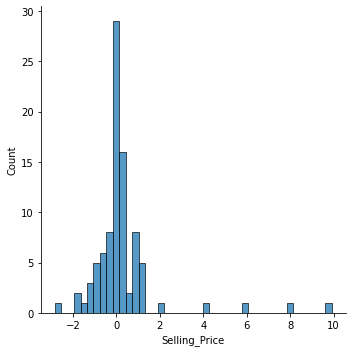

In [52]:
sns.displot(y_test-predictions)

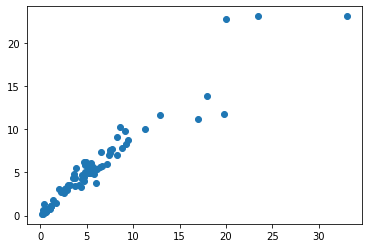

In [53]:
plt.scatter(y_test,predictions)

In [54]:
# import metrics
from sklearn import metrics

In [55]:
# to evaluate the performance of model calculate
#  Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7958415825772771
MSE: 2.87290361695891
RMSE: 1.6949641934149848


In [56]:
#using the pickle module
# saving machine learning models for later use or deployment
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)